In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pylab 
import scipy as sp
import os
import pywt

## Вейвлет «Мексиканская шляпа»

Рассмотрим вейвлет «мексиканская шляпа» во временной и частотной областях:

In [2]:
def wavelet(a, b, t):    
    func = (1 / a ** 0.5) * np.exp(-0.5 * ((t - b) / a) ** 2) * (((t - b) / a) ** 2 - 1)
    return func

In [3]:
x = np.arange(-4, 30, 0.01)
y1 = [wavelet(1, 12, t) for t in x]
y2 = [wavelet(2, 12, t) for t in x]
y3 = [wavelet(4, 12, t) for t in x]

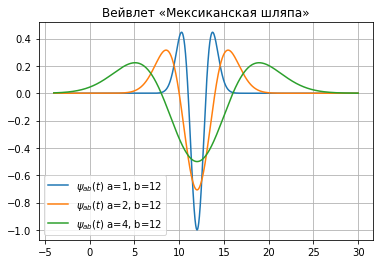

In [4]:
plt.title("Вейвлет «Мексиканская шляпа»")

plt.plot(x, y1,label="$\psi_{ab}(t)$ a=1, b=12") 
plt.plot(x, y2,label="$\psi_{ab}(t)$ a=2, b=12")   
plt.plot(x, y3,label="$\psi_{ab}(t)$ a=4, b=12") 

plt.legend(loc='best')
plt.grid(True)

plt.show()

In [5]:
def plotSpectrum(y, Fs):
    n = len(y) 
    k = np.arange(n)
    T = n / Fs
    frq = k / T
    frq = frq[range(int(n / 2))] 
    Y = pylab.fft(y) / n 
    Y = Y[range(int(n / 2))]
    return Y, frq 

In [6]:
Fs = 1024.0
x = np.arange(-4, 30, 0.2)

y1 = [wavelet(1, 12, t) for t in x]
y2 = [wavelet(2, 12, t) for t in x]
y3 = [wavelet(4, 12, t) for t in x]

Y1, frq1 = plotSpectrum(y1, Fs)
Y2, frq2 = plotSpectrum(y2, Fs)
Y3, frq3 = plotSpectrum(y3, Fs)

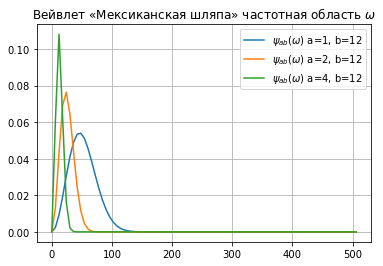

In [7]:
plt.title("Вейвлет «Мексиканская шляпа» частотная область $\omega$")

plt.plot(frq1, abs(Y1), label = "$\psi_{ab}(\omega)$ a=1, b=12")
plt.plot(frq2, abs(Y2), label = "$\psi_{ab}(\omega)$ a=2, b=12")
plt.plot(frq3, abs(Y3), label = "$\psi_{ab}(\omega)$ a=4, b=12")

plt.legend(loc='best')
plt.grid(True)

plt.show()

## Основные свойства вейвлетов

Для работы с вейвлетами нам понадобится библиотека pywt.
PyWavelets — это программное обеспечение для преобразования вейвлетов с открытым исходным кодом для Python.

Рассмотрим вейвлет Хаара — один из первых и наиболее простых вейвлетов. Он основан на ортогональной системе функций, предложенной венгерским математиком Альфредом Хааром в 1909 году.

In [8]:
st = 'haar'
haar = pywt.DiscreteContinuousWavelet(st)
print(haar)

Wavelet haar
  Family name:    Haar
  Short name:     haar
  Filters length: 2
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       asymmetric
  DWT:            True
  CWT:            False


In [9]:
phi, psi, x = haar.wavefun(level=1) 

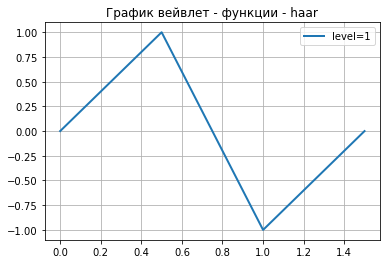

In [10]:
plt.title("График вейвлет - функции - %s" %st)

plt.plot(x, psi, linewidth=2, label='level=1')

plt.grid()
plt.legend(loc='best')

plt.show()

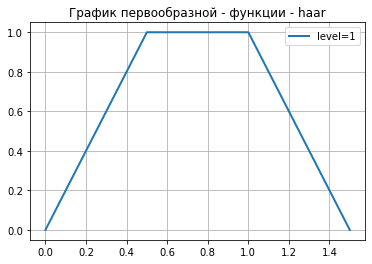

In [11]:
plt.title("График первообразной - функции - %s" %st)

plt.plot(x, phi, linewidth=2, label='level=1')

plt.legend(loc='best')
plt.grid()

plt.show()

Можно получить информацию о центральной частоте psi вейвлет – функции:

In [12]:
cf = pywt.central_frequency('haar', precision=8)
print('Central Frequency: ', cf)

Central Frequency:  0.9961089494163424


## Материнский вейвлет

Для вейвлет-преобразования выбор материнского вейвлета является одной из ключевых задач. 

Рассмотрим список вейвлетов, совместимых с непрерывным вейвлет-преобразованием (CWT):

In [13]:
wavlist = pywt.wavelist(kind='continuous')
print('List of CWT wavelets: ', wavlist)

List of CWT wavelets:  ['cgau1', 'cgau2', 'cgau3', 'cgau4', 'cgau5', 'cgau6', 'cgau7', 'cgau8', 'cmor', 'fbsp', 'gaus1', 'gaus2', 'gaus3', 'gaus4', 'gaus5', 'gaus6', 'gaus7', 'gaus8', 'mexh', 'morl', 'shan']


In [14]:
name = 'mexh'
wavelet_cwt = pywt.ContinuousWavelet(name)
low_b = wavelet_cwt.lower_bound
up_b = wavelet_cwt.upper_bound
print("Непрерывный вейвлет будет оцениваться во всем диапазоне [{}, {}]".format(low_b, up_b))

Непрерывный вейвлет будет оцениваться во всем диапазоне [-8.0, 8.0]


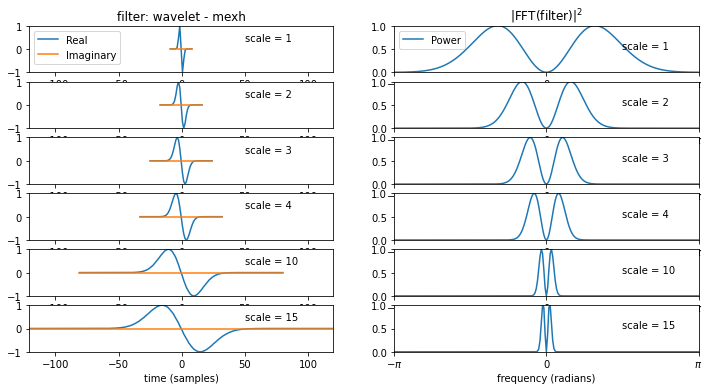

In [15]:
width = up_b - low_b
scales = [1, 2, 3, 4, 10, 15]
max_len = int(np.max(scales) * width + 1)
t = np.arange(max_len)

fig, axes = plt.subplots(len(scales), 2, figsize=(12, 6))

for n, scale in enumerate(scales):
    int_psi, x = pywt.integrate_wavelet(wavelet_cwt, precision=10)
    step = x[1] - x[0]
    
    j = np.floor(np.arange(scale * width + 1) / (scale * step))
    if np.max(j) >= np.size(int_psi):
        j = np.delete(j, np.where((j >= np.size(int_psi)))[0])
    j = j.astype(int)
    
    # normalize int_psi
    int_psi /= np.abs(int_psi).max()
    
    # discrete samples of the combined wavelet
    filt = int_psi[j][::-1]
    nt = len(filt)
    t = np.linspace(-nt // 2, nt // 2, nt)
    
    axes[n, 0].plot(t, filt.real, t, filt.imag)
    axes[n, 0].set_xlim([-max_len // 2, max_len // 2])
    axes[n, 0].set_ylim([-1, 1])
    axes[n, 0].text(50, 0.35, 'scale = {}'.format(scale))
    axes[n, 0].set_xlabel('time (samples)')
    
    f = np.linspace(-np.pi, np.pi, max_len)
    filt_fft = np.fft.fftshift(np.fft.fft(filt, n=max_len))
    filt_fft /= np.abs(filt_fft).max()
     
    axes[n, 1].plot(f, np.abs(filt_fft) ** 2)
    axes[n, 1].set_xlim([-np.pi, np.pi])
    axes[n, 1].set_ylim([0, 1])
    axes[n, 1].set_xticks([-np.pi, 0, np.pi])
    axes[n, 1].set_xticklabels([r'$-\pi$', '0', r'$\pi$'])
    axes[n, 1].text(np.pi / 2, 0.5, 'scale = {}'.format(scale))
    axes[n, 1].set_xlabel('frequency (radians)')

axes[0, 0].set_title('filter: wavelet - %s' %name)
axes[0, 1].set_title(r'|FFT(filter)|$^2$')
    
axes[0, 0].legend(['Real', 'Imaginary'], loc='upper left')
axes[0, 1].legend(['Power'], loc='upper left')

plt.show()